# Machine Learning Essentials SS25 - Exercise Sheet 3

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 3

## Task 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Define network parameters
# Hidden layer
W1 = np.array([[8, -4], [-4, 8]])
b1 = np.array([-6, -6])
# Output layer
w2 = np.array([1, 1])
b2 = -0.5

class XORNetwork:
    def __init__(self, W1, b1, w2, b2):
        self.W1 = W1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    # TODO: Implement the forward pass (& activation) of the two-layer network
    def sigmoid(self, z):
        """Sigmoid activation function"""
        return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clipping to prevent overflow
    

    # Define sigmoid activation function
    def forward(self, x):
        """
        Forward pass through the network. Returns hidden layer activations and output.
        """
        # Hidden layer computation: phi = sigma(W1 * x + b1)
        z_hidden = np.dot(self.W1, x) + self.b1
        phi = self.sigmoid(z_hidden)
        
        # Output layer computation: output = sigma(w2^T * phi + b2)
        z_output = np.dot(self.w2, phi) + self.b2
        output = self.sigmoid(z_output)
        
        return phi, output

### Task 3

XOR Dataset and Network Outputs:
Input (x1, x2) | True XOR | Network Output
----------------------------------------
(0, 0)        |    0     |    0.3787
(0, 1)        |    1     |    0.5941
(1, 0)        |    1     |    0.5941
(1, 1)        |    0     |    0.4350


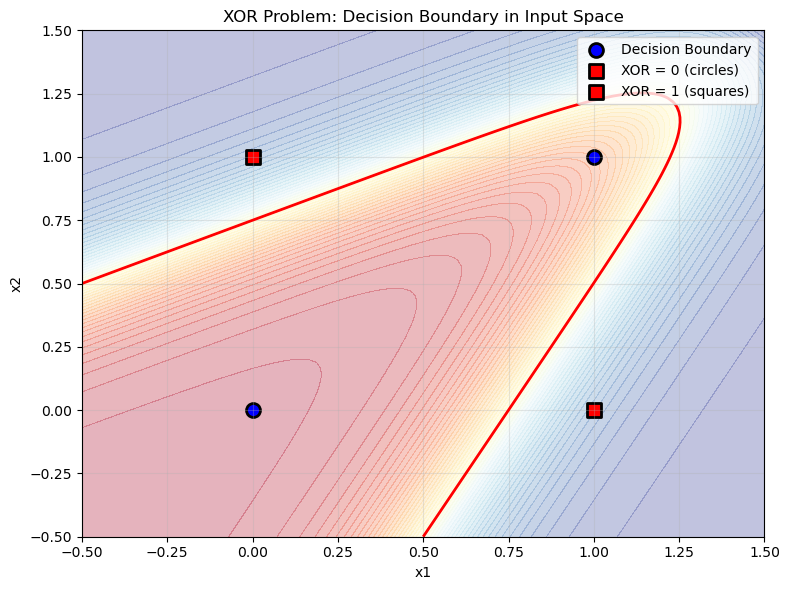

In [2]:
# TODO: Create XOR dataset, compute outputs & visualize decision boundary
network = XORNetwork(W1, b1, w2, b2)

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_true = np.array([0, 1, 1, 0])  # XOR truth table

print("XOR Dataset and Network Outputs:")
print("Input (x1, x2) | True XOR | Network Output")
print("-" * 40)

network_outputs = []
for i, x_input in enumerate(X):
    phi, output = network.forward(x_input)
    network_outputs.append(output)
    print(f"({x_input[0]}, {x_input[1]})        |    {y_true[i]}     |    {output:.4f}")

# Visualize decision boundary in original input space
def plot_decision_boundary_input_space():
    plt.figure(figsize=(8, 6))
    
    # Create a grid of points
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 100), np.linspace(-0.5, 1.5, 100))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    
    # Compute network outputs for all grid points
    Z = []
    for point in grid_points:
        _, output = network.forward(point)
        Z.append(output)
    Z = np.array(Z).reshape(xx.shape)
    
    # Plot decision boundary (where output = 0.5)
    plt.contour(xx, yy, Z, levels=[0.5], colors='red', linewidths=2)
    plt.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')
    
    # Plot XOR data points
    colors = ['blue', 'red']
    for i, (x_point, label) in enumerate(zip(X, y_true)):
        plt.scatter(x_point[0], x_point[1], c=colors[label], s=100, 
                   marker='o' if label == 0 else 's', edgecolors='black', linewidth=2)
    
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('XOR Problem: Decision Boundary in Input Space')
    plt.grid(True, alpha=0.3)
    plt.legend(['Decision Boundary', 'XOR = 0 (circles)', 'XOR = 1 (squares)'])
    plt.tight_layout()
    plt.show()

plot_decision_boundary_input_space()



### TASK 4

# Task 2.4: Linear Network Equivalence Proof

## Problem Statement
Consider a network with L layers where each layer is linear (identity activation):
$$\tilde{z}^{(l)} = W^{(l)} \tilde{z}^{(l-1)} + b^{(l)} \text{ for } l = 1, \ldots, L$$
with $\tilde{z}^{(0)} = x$.

**Goal:** Show this is equivalent to a single linear layer and explain why nonlinear activations are necessary.

---

## Mathematical Proof

### Step 1: Expand the Network Recursively

Let's trace through the network layer by layer:

**Layer 1:**
$$\tilde{z}^{(1)} = W^{(1)} \tilde{z}^{(0)} + b^{(1)} = W^{(1)} x + b^{(1)}$$

**Layer 2:**
$$\tilde{z}^{(2)} = W^{(2)} \tilde{z}^{(1)} + b^{(2)}$$
$$= W^{(2)} (W^{(1)} x + b^{(1)}) + b^{(2)}$$
$$= W^{(2)} W^{(1)} x + W^{(2)} b^{(1)} + b^{(2)}$$

**Layer 3:**
$$\tilde{z}^{(3)} = W^{(3)} \tilde{z}^{(2)} + b^{(3)}$$
$$= W^{(3)} (W^{(2)} W^{(1)} x + W^{(2)} b^{(1)} + b^{(2)}) + b^{(3)}$$
$$= W^{(3)} W^{(2)} W^{(1)} x + W^{(3)} W^{(2)} b^{(1)} + W^{(3)} b^{(2)} + b^{(3)}$$

### Step 2: General Pattern Recognition

By induction, we can see that for any L-layer linear network:

$$\tilde{z}^{(L)} = \left(\prod_{i=L}^{1} W^{(i)}\right) x + \text{combined bias terms}$$

where $\prod_{i=L}^{1} W^{(i)} = W^{(L)} W^{(L-1)} \cdots W^{(2)} W^{(1)}$

### Step 3: Equivalent Single Layer Form

The output can be written as:
$$\tilde{z}^{(L)} = W_{\text{equiv}} x + b_{\text{equiv}}$$

where:
- **Equivalent weight matrix:** $W_{\text{equiv}} = W^{(L)} W^{(L-1)} \cdots W^{(2)} W^{(1)}$
- **Equivalent bias vector:** $b_{\text{equiv}} = W^{(L)} W^{(L-1)} \cdots W^{(2)} b^{(1)} + W^{(L)} W^{(L-1)} \cdots W^{(3)} b^{(2)} + \cdots + W^{(L)} b^{(L-1)} + b^{(L)}$

### Step 4: Formal Proof by Induction

**Base case (L=1):** Trivially true: $\tilde{z}^{(1)} = W^{(1)} x + b^{(1)}$

**Inductive step:** Assume true for L-1 layers:
$$\tilde{z}^{(L-1)} = W_{\text{equiv}}^{(L-1)} x + b_{\text{equiv}}^{(L-1)}$$

Then for L layers:
$$\tilde{z}^{(L)} = W^{(L)} \tilde{z}^{(L-1)} + b^{(L)}$$
$$= W^{(L)} (W_{\text{equiv}}^{(L-1)} x + b_{\text{equiv}}^{(L-1)}) + b^{(L)}$$
$$= (W^{(L)} W_{\text{equiv}}^{(L-1)}) x + (W^{(L)} b_{\text{equiv}}^{(L-1)} + b^{(L)})$$

This is still in the form $W_{\text{equiv}} x + b_{\text{equiv}}$, completing the proof. □

---

## Why Nonlinear Activations Are Necessary

### 1. **Expressiveness Limitation**
- **Linear networks:** Can only represent linear transformations, regardless of depth
- **Decision boundaries:** Limited to linear hyperplanes in input space
- **Function class:** All L-layer linear networks ⊆ {single linear transformations}

### 2. **XOR Problem Analysis**
The XOR function requires a **nonlinear decision boundary**:

| x₁ | x₂ | XOR |
|----|----|----|
| 0  | 0  | 0  |
| 0  | 1  | 1  |
| 1  | 0  | 1  |
| 1  | 1  | 0  |

**Geometric insight:** No single line can separate the points {(0,0), (1,1)} from {(0,1), (1,0)}.

**Mathematical proof:** Assume linear classifier $f(x) = w₁x₁ + w₂x₂ + b$
- For XOR=0: $w₁ \cdot 0 + w₂ \cdot 0 + b < 0$ and $w₁ \cdot 1 + w₂ \cdot 1 + b < 0$
- For XOR=1: $w₁ \cdot 0 + w₂ \cdot 1 + b > 0$ and $w₁ \cdot 1 + w₂ \cdot 0 + b > 0$

This gives us: $b < 0$, $w₁ + w₂ + b < 0$, $w₂ + b > 0$, $w₁ + b > 0$

From the inequalities: $w₁ + w₂ < -b < \min(w₁, w₂)$, which is impossible.

### 3. **Role of Nonlinear Activations**
- **Feature transformation:** Each layer with nonlinear activation can transform the input space
- **Increased expressiveness:** Networks can learn complex, nonlinear mappings
- **Universal approximation:** Deep networks with nonlinear activations can approximate any continuous function
- **Hierarchical representations:** Each layer learns increasingly complex features

### 4. **Practical Implications**
Without nonlinear activations:
- Cannot solve XOR, parity functions, or any linearly inseparable problems
- Adding more layers provides no benefit
- Network reduces to expensive matrix multiplication

With nonlinear activations:
-  Can solve complex nonlinear problems
-  Each layer adds representational power
-  Can learn hierarchical feature representations

---

## Conclusion

**Key Takeaway:** Stacking linear transformations yields another linear transformation. The composition of any number of linear functions is still linear, so deep linear networks have no advantage over shallow ones.

Nonlinear activations are the source of neural networks' power—they enable the learning of complex, nonlinear mappings that can solve problems like XOR that are impossible for linear models.

### Task 5

Input (x1, x2) | Hidden Layer (φ1, φ2)
-----------------------------------
(0, 0)        | (0.0025, 0.0025)
(0, 1)        | (0.0000, 0.8808)
(1, 0)        | (0.8808, 0.0000)
(1, 1)        | (0.1192, 0.1192)


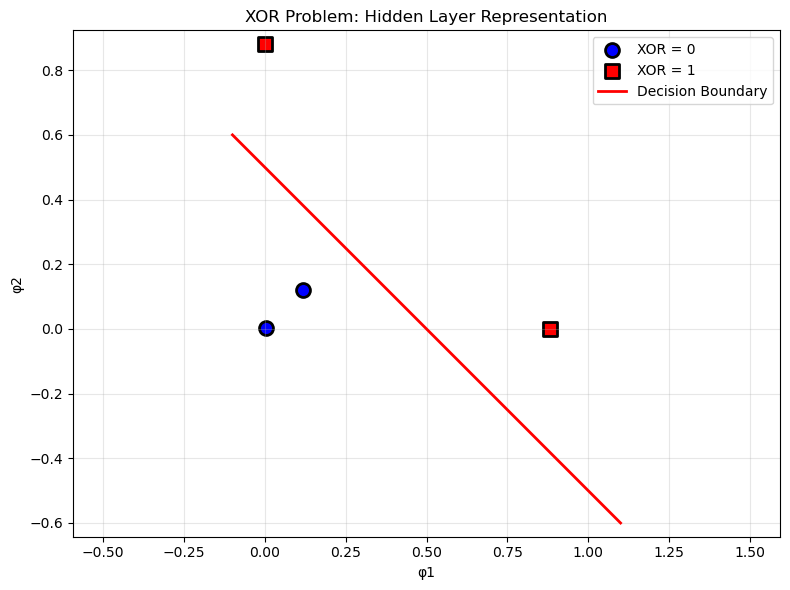


Decision boundary in hidden space: φ1 + φ2 = 0.5
(Derived from w2^T * φ + b2 = 0, where w2 = [1 1] and b2 = -0.5)


In [3]:
# TODO: (a) Compute hidden layer activations
print("Input (x1, x2) | Hidden Layer (φ1, φ2)")
print("-" * 35)

hidden_activations = []
for i, x_input in enumerate(X):
    phi, _ = network.forward(x_input)
    hidden_activations.append(phi)
    print(f"({x_input[0]}, {x_input[1]})        | ({phi[0]:.4f}, {phi[1]:.4f})")

hidden_activations = np.array(hidden_activations)


# TODO: (b) Create scatter plot in the (phi1, phi2) plane, coloring points by their label
def plot_hidden_space():
    plt.figure(figsize=(8, 6))
    
    # Plot hidden layer activations colored by XOR output
    colors = ['blue', 'red']
    markers = ['o', 's']
    labels = ['XOR = 0', 'XOR = 1']
    
    for label in [0, 1]:
        mask = y_true == label
        plt.scatter(hidden_activations[mask, 0], hidden_activations[mask, 1], 
                   c=colors[label], s=100, marker=markers[label], 
                   edgecolors='black', linewidth=2, label=labels[label])


# TODO: (c) Draw the output layer's decision boundary in the (phi1, phi2) space
    phi1_range = np.linspace(-0.1, 1.1, 100)
    phi2_boundary = 0.5 - phi1_range
    plt.plot(phi1_range, phi2_boundary, 'red', linewidth=2, label='Decision Boundary')
    
    # Add grid and labels
    plt.xlabel('φ1')
    plt.ylabel('φ2')
    plt.title('XOR Problem: Hidden Layer Representation')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Print the decision boundary equation
    print(f"\nDecision boundary in hidden space: φ1 + φ2 = 0.5")
    print(f"(Derived from w2^T * φ + b2 = 0, where w2 = {w2} and b2 = {b2})")

plot_hidden_space()


<b>TODO</b>: (d) Briefly discuss the result

VISUALIZATION ANALYSIS:

1. ORIGINAL SPACE (x1, x2):
   - XOR data points are NOT linearly separable
   - No single line can separate XOR=0 from XOR=1 points
   - Points (0,0) and (1,1) have XOR=0, while (0,1) and (1,0) have XOR=1

2. HIDDEN SPACE (φ1, φ2):
   - The hidden layer transforms the input space
   - After transformation, the points BECOME linearly separable
   - The decision boundary φ1 + φ2 = 0.5 cleanly separates the classes

3. KEY INSIGHT:
   - Hidden layer acts as a feature extractor
   - It creates a new representation where the problem becomes solvable
   - φ1 ≈ 1 when x1=1 and x2=0, φ1 ≈ 0 otherwise
   - φ2 ≈ 1 when x1=0 and x2=1, φ2 ≈ 0 otherwise
   - Output layer performs linear classification on these engineered features

4. WHY SINGLE LAYER FAILS:
   - Single logistic regression can only learn linear decision boundaries
   - XOR requires a nonlinear boundary in original input space
   - No linear combination of x1 and x2 can solve XOR

5. WHY LINEAR NETWORKS FAIL:
   - As proven in Task 4, multiple linear layers = single linear layer
   - Still limited to linear decision boundaries
   - Cannot create the necessary nonlinear transformation

The 2-layer network succeeds because:
- Hidden layer creates nonlinear features through sigmoid activation
- These features make the problem linearly separable
- Output layer performs simple linear classification on transformed features